# House Price Prediction Using Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate

In [2]:
data = pd.read_csv("C:\\Users\\vdini\\Desktop\\Bharat intern\\House price\\kc_house_data.csv\\kc_house_data.csv")

In [3]:
X = data[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = data['price']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model

In [5]:
model = LinearRegression()

In [6]:
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)

In [8]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [9]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 45173046132.79148
R-squared: 0.7011904448878326


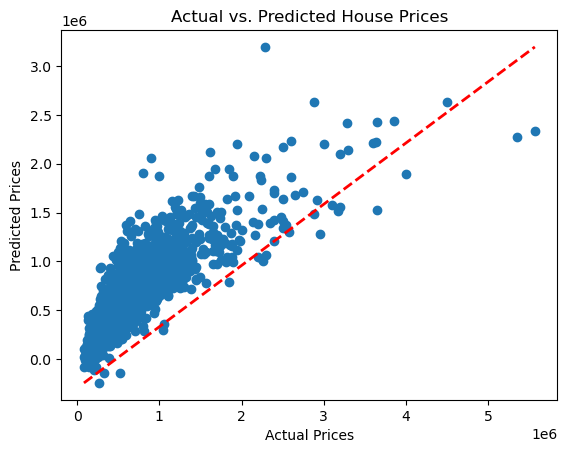

In [10]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linestyle='--', lw=2)
plt.show()

# Output

In [11]:
predictions = model.predict(X) 
threshold_price = 500000
data['Predicted_Price'] = predictions
data['Price_Classification'] = np.where(data['Predicted_Price'] > threshold_price, 'Higher', 'Lower')

table_data = data[['price', 'Predicted_Price', 'Price_Classification']].head()
table = tabulate(table_data, headers='keys', tablefmt='pretty', showindex=False)
print(table)

+----------+--------------------+----------------------+
|  price   |  Predicted_Price   | Price_Classification |
+----------+--------------------+----------------------+
| 221900.0 | 210969.64031197783 |        Lower         |
| 538000.0 | 734786.9796632268  |        Higher        |
| 180000.0 | 378458.5017363569  |        Lower         |
| 604000.0 | 455379.99689176586 |        Lower         |
| 510000.0 | 442323.83580938075 |        Lower         |
+----------+--------------------+----------------------+


# Prediction Of New Data

In [12]:
new_data = pd.DataFrame({
    'sqft_living': [2500],      
    'bedrooms': [3],
    'bathrooms': [2.5],
    'sqft_lot': [5000],
    'floors': [2],
    'waterfront': [0],
    'view': [2],
    'condition': [3],
    'grade': [7],
    'sqft_above': [2000],
    'sqft_basement': [500],
    'yr_built': [1990],
    'yr_renovated': [0],
    'zipcode': [98103],
    'lat': [47.6542],
    'long': [-122.3469],
    'sqft_living15': [2200],
    'sqft_lot15': [4500]
})

In [13]:
predicted_price = model.predict(new_data)
print(f"Predicted Price for the New Data Point: ${predicted_price[0]:,.2f}")

Predicted Price for the New Data Point: $681,787.89
